# Model

In [1]:
import sys
from pathlib import Path

project_root = Path().resolve().parent
sys.path.append(str(project_root))

In [2]:
import pandas as pd
import numpy as np

from config.features import CAT_FEATURES

# sklearn utilities
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import KFold, train_test_split

# sklearn models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
train = pd.read_parquet('../data/train.parquet')

In [ ]:
X = train.drop(columns=['isFraud'])
y = train['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)

print(X_train.shape)
print(y_train.shape)

(413378, 252)
(413378,)


In [5]:
del train

### Pre-processing

In [6]:
X_train = X_train.replace([np.inf, -np.inf], -999)
X_test = X_test.replace([np.inf, -np.inf], -999)

In [7]:
X_train[CAT_FEATURES] = X_train[CAT_FEATURES].astype(str)
X_test[CAT_FEATURES] = X_test[CAT_FEATURES].astype(str)

In [8]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, [col for col in X_train.columns if col not in CAT_FEATURES]),
        ('cat', categorical_transformer, CAT_FEATURES)
    ]
)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [9]:
del X_train, X_test

#### Model Selection

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_transformed, y_train)

y_pred = decision_tree.predict(X_test_transformed)

TypeError: ClassifierMixin.score() missing 2 required positional arguments: 'X' and 'y'

In [ ]:
confusion_matrix(y_test, y_pred)

array([[167647,   3316],
       [  2654,   3545]])

In [15]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')

Accuracy: 0.9663020286517425
Precision: 0.5166885293688966
Recall: 0.571866430069366
F1 Score: 0.5428790199081164


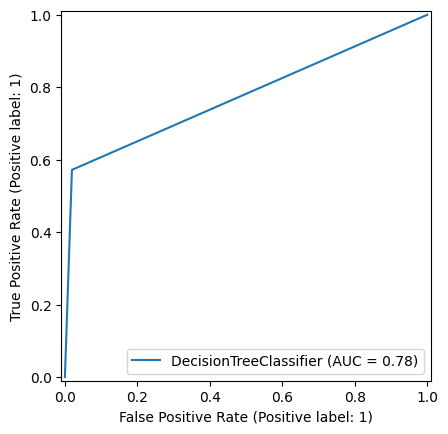

In [19]:
RocCurveDisplay.from_estimator(decision_tree, X_test_transformed, y_test)